<a href="https://colab.research.google.com/github/Ganga-dhar/Image-Classification-uisng-CNN/blob/main/Dog_and_Cat_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.5.0


In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "mathyam" # username from the json file
os.environ['KAGGLE_KEY'] = "ac43c48d6cec800e4ff66f9e864fba08" # Provide your key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

train.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Upload data and extract the contents
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [7]:
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small1'
os.mkdir(base_dir) #make base directory

In [8]:
#Create directory paths

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)


test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)


test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
import shutil

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    

fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))


print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 8000
total training dog images: 8000
total test cat images: 2000
total test dog images: 2000


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
training_set = train_datagen.flow_from_directory('/content/cats_and_dogs_small1/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 16000 images belonging to 2 classes.


In [15]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/cats_and_dogs_small1/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [16]:
from tensorflow.keras.layers import Conv2D

In [18]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [21]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
500/500 [==============================] - 61s 121ms/step - loss: 0.4977 - accuracy: 0.7584 - val_loss: 0.5183 - val_accuracy: 0.7370
Epoch 2/5
500/500 [==============================] - 59s 118ms/step - loss: 0.4795 - accuracy: 0.7692 - val_loss: 0.4230 - val_accuracy: 0.8085
Epoch 3/5
500/500 [==============================] - 58s 117ms/step - loss: 0.4574 - accuracy: 0.7833 - val_loss: 0.4024 - val_accuracy: 0.8200
Epoch 4/5
500/500 [==============================] - 59s 118ms/step - loss: 0.4426 - accuracy: 0.7936 - val_loss: 0.4055 - val_accuracy: 0.8155
Epoch 5/5
500/500 [==============================] - 61s 122ms/step - loss: 0.4311 - accuracy: 0.8017 - val_loss: 0.3810 - val_accuracy: 0.8322


In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [23]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [27]:
history = model.fit_generator(training_set,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_data=test_set,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 11s 110ms/step - loss: 0.4291 - accuracy: 0.8025 - val_loss: 0.3975 - val_accuracy: 0.8250
Epoch 2/5
100/100 [==============================] - 11s 109ms/step - loss: 0.4164 - accuracy: 0.8100 - val_loss: 0.4245 - val_accuracy: 0.8062
Epoch 3/5
100/100 [==============================] - 11s 110ms/step - loss: 0.4294 - accuracy: 0.7953 - val_loss: 0.4180 - val_accuracy: 0.8125
Epoch 4/5
100/100 [==============================] - 11s 111ms/step - loss: 0.4072 - accuracy: 0.8144 - val_loss: 0.3614 - val_accuracy: 0.8219
Epoch 5/5
100/100 [==============================] - 11s 110ms/step - loss: 0.4053 - accuracy: 0.8109 - val_loss: 0.4366 - val_accuracy: 0.7812


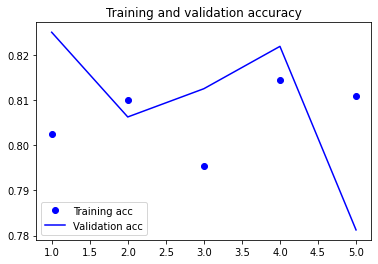

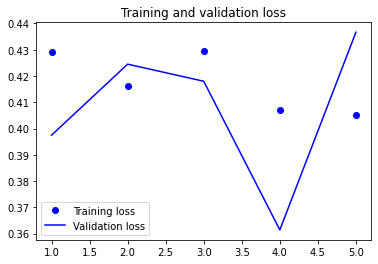

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Convolutional Netwroks with DropOut

In [31]:
# Part 2 - Building the CNN with dropout

# Initialising the CNN
cnn1 = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn1.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn1.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Adding a another convolutional layer
cnn1.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn1.add(tf.keras.layers.Flatten())

##Adding drop out lapyer
cnn1.add(tf.keras.layers.Dropout(0.5))

# Step 4 - Full Connection
cnn1.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
cnn1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [34]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn1.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
500/500 [==============================] - 59s 117ms/step - loss: 0.6561 - accuracy: 0.6087 - val_loss: 0.5792 - val_accuracy: 0.7038
Epoch 2/5
500/500 [==============================] - 60s 120ms/step - loss: 0.5927 - accuracy: 0.6882 - val_loss: 0.5106 - val_accuracy: 0.7405
Epoch 3/5
500/500 [==============================] - 59s 118ms/step - loss: 0.5449 - accuracy: 0.7273 - val_loss: 0.4834 - val_accuracy: 0.7682
Epoch 4/5
500/500 [==============================] - 59s 117ms/step - loss: 0.5055 - accuracy: 0.7544 - val_loss: 0.4432 - val_accuracy: 0.7912
Epoch 5/5
500/500 [==============================] - 58s 116ms/step - loss: 0.4851 - accuracy: 0.7669 - val_loss: 0.4197 - val_accuracy: 0.8040


In [43]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/cats_and_dogs_small1/test/dogs/dog.1002.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [44]:
result

array([[0.638415]], dtype=float32)

In [40]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/cats_and_dogs_small1/test/cats/cat.1002.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [41]:
result

array([[0.06170677]], dtype=float32)

In [42]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat


Evaluating the accuracy and loss of the model

Text(0.5, 1.0, 'Training and validation loss')

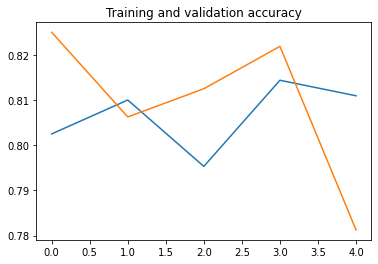

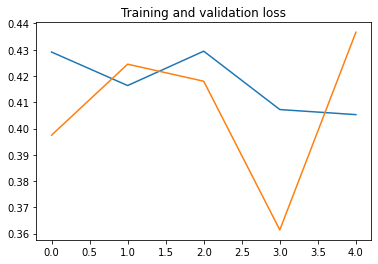

In [47]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [48]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
cnn2 = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [53]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn2.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
500/500 [==============================] - 62s 122ms/step - loss: 0.6935 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
500/500 [==============================] - 61s 122ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/5
500/500 [==============================] - 61s 122ms/step - loss: 0.6935 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
500/500 [==============================] - 61s 122ms/step - loss: 0.6934 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
500/500 [==============================] - 60s 120ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.5000
